In [4]:
UNU_to_EU6 = {
    1:      4,
    2:      4,
    101:    4,
    102:    4,
    103:    4,
    104:    4,
    105:    4,
    106:    4,
    108:    1,
    109:    1,
    111:    1,
    112:    1,
    113:    1,
    114:    5,
    201:    5,
    202:    5,
    203:    5,
    204:    5,
    205:    5,
    301:    6,
    302:    6,
    303:    2,
    304:    6,
    305:    6,
    306:    6,
    307:    4,
    308:    2,
    309:    2,
    401:    5,
    402:    5,
    403:    5,
    404:    5,
    405:    5,
    406:    5,
    407:    2,
    408:    2,
    501:    5,
    502:    3,
    503:    3,
    504:    3,
    505:    3,
    506:    5,
    507:    5,
    601:    5,
    602:    4,
    701:    5,
    702:    6,
    703:    4,
    801:    5,
    802:    4,
    901:    5,
    902:    4,
    1001:   4,
    1002:   1
}

In [5]:
import pandas as pd
import numpy as np

header = ['flux', 'month', 'year', 'cpf6', 'a129', 'nc8', 'country', 'euro', 'kg', 'unite_supplementaire']

nc8_to_unu = pd.read_csv('nc8_to_unu_digital.csv')
nc8_to_unu = dict(zip(list(nc8_to_unu['nc8']), list(nc8_to_unu['unu'])))

def add_unu(df):
    nc8_list = list(df['nc8'])
    unu_list = [nc8_to_unu[n] for n in nc8_list]
    df['unu'] = unu_list
    return df

def add_eu6(df):
    unu_list = list(df['unu'])
    eu6_list = [UNU_to_EU6[u] for u in unu_list]
    df['eu6'] = eu6_list
    return df

In [6]:
pom_eu6_list = []

for year in range(2004,2022+1):
    imp = pd.read_csv('./data/National_'+str(year)+'_Import.txt', sep=';', names=header)
    exp = pd.read_csv('./data/National_'+str(year)+'_Export.txt', sep=';', names=header)

    imp = imp[imp['nc8'].isin(list(nc8_to_unu.keys()))]
    exp = exp[exp['nc8'].isin(list(nc8_to_unu.keys()))]

    imp = add_unu(imp)
    exp = add_unu(exp)

    imp = add_eu6(imp)
    exp = add_eu6(exp)

    imp_eu6 = imp.groupby('eu6')['kg'].sum()
    exp_eu6 = exp.groupby('eu6')['kg'].sum()

    # Add missing categories
    for cat in range(1,6+1):
        if cat not in imp_eu6.index:
            imp_eu6[cat] = 0
        if cat not in exp_eu6.index:
            exp_eu6[cat] = 0
    
    imp_eu6 = imp_eu6.sort_index()
    exp_eu6 = exp_eu6.sort_index()
    
    pom_eu6_list.append(list(imp_eu6 - exp_eu6))

/tmp/ipykernel_18996/2553044072.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  imp = pd.read_csv('./data/National_'+str(year)+'_Import.txt', sep=';', names=header)
/tmp/ipykernel_18996/2553044072.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exp = pd.read_csv('./data/National_'+str(year)+'_Export.txt', sep=';', names=header)
/tmp/ipykernel_18996/2553044072.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  imp = pd.read_csv('./data/National_'+str(year)+'_Import.txt', sep=';', names=header)
/tmp/ipykernel_18996/2553044072.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exp = pd.read_csv('./data/National_'+str(year)+'_Export.txt', sep=';', names=header)
/tmp/ipykernel_18996/2553044072.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype opti

In [7]:
pom_eu6 = pd.DataFrame(np.transpose(np.array(pom_eu6_list)), index=range(1,6+1), columns=range(2004,2022+1))
pom_eu6

2004      2005      2006      2007      2008      2009      2010  \
1         0         0         0         0         0         0         0   
2   7675126  11849190  10171639  14018621   9690682   8696758  11111608   
3         0         0         0         0         0         0         0   
4    436987    566535    614365    829151   1229243   1065548   1425062   
5  31081002  26417505  24057113  29634954  29132594  21854840  32506810   
6  13850809  14964314  26640106  79364544  69759500  46170653  66192346   

        2011      2012      2013      2014      2015      2016      2017  \
1          0         0         0         0         0         0         0   
2  103111404  72042737  66195738  68945363  63462040  73180207  58831911   
3          0         0         0         0         0         0         0   
4    1567154   1468623   1377971   1164994    720897    911197  -4145415   
5   31068753  25790854  20796419  16019743  16330409  16309235  12049853   
6   78936152  62605046  57661263  58304776  57219364  53494974  77161441   

       2018      2019      2020      2021      2022  
1         0         0         0         0         0  
2  63669958  59561082  61112195  63614797  54527363  
3         0         0         0         0         0  
4  -6826101  -3174858  -2588986  -4176551  -3434549  
5  15819252  14690670  11723170  12108762   9755174  
6  67688725  70066555  57932931  63368793  54765845

Text(0.5, 1.0, 'EEE that are placed on market in 2019 in tonnes')

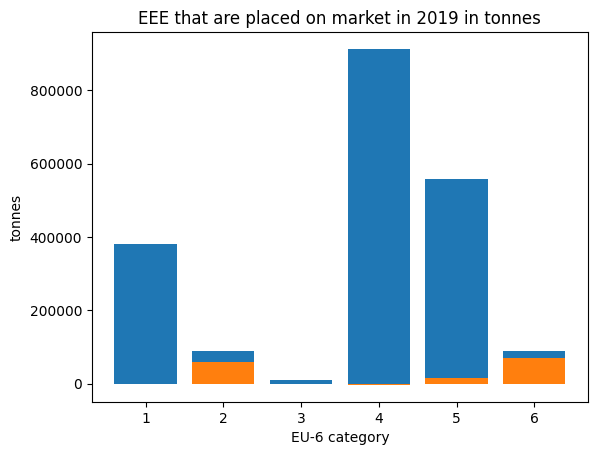

In [8]:
import matplotlib.pyplot as plt

# Data from ADEME
POM_EEE_2019 = [381336, 90399, 10059, 912463, 557522, 90044]

plt.bar([cat for cat in range(1,7)], POM_EEE_2019)
plt.bar([cat for cat in range(1,7)], [x/1000 for x in list(pom_eu6.loc[:, 2019])])
plt.xlabel('EU-6 category')
plt.ylabel('tonnes')
plt.title('EEE that are placed on market in 2019 in tonnes')